# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 1
A = 0.05#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [2]:
global loggrid=true
global bisection=false
global meshrefinement=false;

In [3]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [4]:
print(N)

400.0

In [5]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [6]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [7]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.0025
the time step is 0.00025


# Initial data of m β Ψ and Ψ,x

In [8]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)

#PSI
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [9]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [10]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [11]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

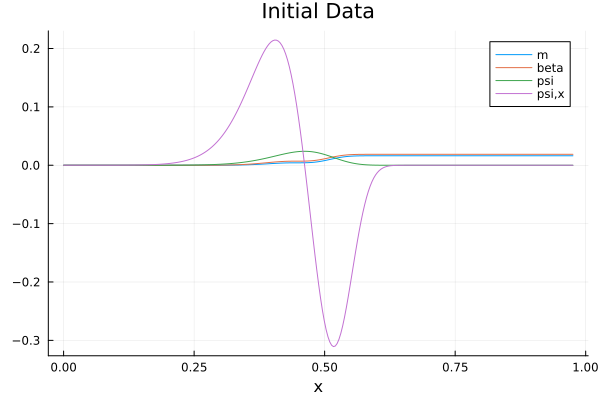

In [12]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [13]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [14]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [15]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.04996591249745638


In [16]:
using Base.Threads
Threads.nthreads()

4

In [17]:
#global dt = 5e-5/4/2

 ## Time evolution

fixed grid

In [18]:
finaltime=1.3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 1.2491478124364097e-5, t=0.0012491478124364078 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 200 dt is 1.2491478124364097e-5, t=0.0024982956248728165 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 300 dt is 1.2491478124364097e-5, t=0.0037474434373092375 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 400 dt is 1.2491478124364097e-5, t=0.004996591249745621 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 500 dt is 1.2491478124364097e-5, t=0.006245739062181998 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 600 dt is 1.2491478124364097e-5, t=0.007494886874618376 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 700 dt is 1.2491478124364097e-5, t=0.008744034687054819 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 800 dt is 1.2491478124364097e-5, t=0.009993182499491283 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 900 dt is



iteration 6900 dt is 1.2491478124364097e-5, t=0.08619119905810582 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 7000 dt is 1.2491478124364097e-5, t=0.08744034687054211 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 7100 dt is 1.2491478124364097e-5, t=0.0886894946829784 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 7200 dt is 1.2491478124364098e-5, t=0.0899386424954147 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 7300 dt is 1.2491478124364098e-5, t=0.09118779030785099 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 7400 dt is 1.2491478124364098e-5, t=0.09243693812028728 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 7500 dt is 1.2491478124364098e-5, t=0.09368608593272357 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 7600 dt is 1.2491478124364098e-5, t=0.09493523374515986 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 7700 dt is 1.249147



iteration 13600 dt is 1.2491478124364095e-5, t=0.1698841024913872 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 13700 dt is 1.2491478124364097e-5, t=0.17113325030382487 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 13800 dt is 1.2491478124364097e-5, t=0.17238239811626255 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 13900 dt is 1.2491478124364095e-5, t=0.17363154592870023 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 14000 dt is 1.2491478124364097e-5, t=0.1748806937411379 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 14100 dt is 1.2491478124364097e-5, t=0.17612984155357558 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 14200 dt is 1.2491478124364097e-5, t=0.17737898936601326 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 14300 dt is 1.2491478124364095e-5, t=0.17862813717845094 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 144



iteration 20300 dt is 1.2491478124364097e-5, t=0.25357700592471166 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 20400 dt is 1.2491478124364097e-5, t=0.25482615373714934 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 20500 dt is 1.2491478124364097e-5, t=0.256075301549587 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 20600 dt is 1.2491478124364095e-5, t=0.2573244493620247 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 20700 dt is 1.2491478124364098e-5, t=0.2585735971744624 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 20800 dt is 1.2491478124364095e-5, t=0.25982274498690006 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 20900 dt is 1.2491478124364097e-5, t=0.26107189279933773 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 21000 dt is 1.2491478124364095e-5, t=0.2623210406117754 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 21100 d



iteration 27000 dt is 1.2491478124364097e-5, t=0.33726990935803614 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 27100 dt is 1.2491478124364097e-5, t=0.3385190571704738 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 27200 dt is 1.2491478124364095e-5, t=0.3397682049829115 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 27300 dt is 1.2491478124364095e-5, t=0.34101735279534917 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 27400 dt is 1.2491478124364095e-5, t=0.34226650060778685 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 27500 dt is 1.2491478124364095e-5, t=0.34351564842022453 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 27600 dt is 1.2491478124364097e-5, t=0.3447647962326622 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 27700 dt is 1.2491478124364095e-5, t=0.3460139440450999 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 278



iteration 33700 dt is 1.2491478124364098e-5, t=0.4209628127913606 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 33800 dt is 1.2491478124364095e-5, t=0.4222119606037983 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 33900 dt is 1.2491478124364095e-5, t=0.42346110841623597 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 34000 dt is 1.2491478124364095e-5, t=0.42471025622867364 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 34100 dt is 1.2491478124364095e-5, t=0.4259594040411113 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 34200 dt is 1.2491478124364097e-5, t=0.427208551853549 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 34300 dt is 1.2491478124364097e-5, t=0.4284576996659867 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 34400 dt is 1.2491478124364095e-5, t=0.42970684747842436 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 34500 



iteration 40400 dt is 1.2491478124364095e-5, t=0.5046557162246644 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 40500 dt is 1.2491478124364095e-5, t=0.5059048640370966 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 40600 dt is 1.2491478124364097e-5, t=0.5071540118495287 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 40700 dt is 1.2491478124364097e-5, t=0.5084031596619608 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 40800 dt is 1.2491478124364095e-5, t=0.5096523074743929 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 40900 dt is 1.2491478124364097e-5, t=0.5109014552868251 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 41000 dt is 1.2491478124364095e-5, t=0.5121506030992572 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 41100 dt is 1.2491478124364095e-5, t=0.5133997509116893 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 41200 d



iteration 47100 dt is 1.2491478124364095e-5, t=0.588348619657617 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 47200 dt is 1.2491478124364095e-5, t=0.5895977674700491 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 47300 dt is 1.2491478124364097e-5, t=0.5908469152824812 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 47400 dt is 1.2491478124364095e-5, t=0.5920960630949134 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 47500 dt is 1.2491478124364095e-5, t=0.5933452109073455 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 47600 dt is 1.2491478124364097e-5, t=0.5945943587197776 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 47700 dt is 1.2491478124364097e-5, t=0.5958435065322097 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 47800 dt is 1.2491478124364095e-5, t=0.5970926543446419 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 47900 dt



iteration 53900 dt is 1.2491478124364095e-5, t=0.6732906709030017 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 54000 dt is 1.2491478124364093e-5, t=0.6745398187154338 speed is 0.49998750891195465, dx/dt=200.1364430302173


iteration 54100 dt is 1.2491478124364095e-5, t=0.6757889665278659 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 54200 dt is 1.2491478124364095e-5, t=0.677038114340298 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 54300 dt is 1.2491478124364095e-5, t=0.6782872621527302 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 54400 dt is 1.2491478124364097e-5, t=0.6795364099651623 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 54500 dt is 1.2491478124364097e-5, t=0.6807855577775944 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 54600 dt is 1.2491478124364098e-5, t=0.6820347055900265 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 54700 dt i



iteration 60700 dt is 1.2491478124364095e-5, t=0.7582327221483863 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 60800 dt is 1.2491478124364095e-5, t=0.7594818699608185 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 60900 dt is 1.2491478124364097e-5, t=0.7607310177732506 speed is 0.4999875089119545, dx/dt=200.13644303021724


iteration 61000 dt is 1.2491478124364098e-5, t=0.7619801655856827 speed is 0.4999875089119544, dx/dt=200.1364430302172


iteration 61100 dt is 1.2491478124364095e-5, t=0.7632293133981148 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 61200 dt is 1.2491478124364095e-5, t=0.764478461210547 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 61300 dt is 1.2491478124364095e-5, t=0.7657276090229791 speed is 0.49998750891195454, dx/dt=200.13644303021727


iteration 61400 dt is 1.2491478124364093e-5, t=0.7669767568354112 speed is 0.49998750891195465, dx/dt=200.1364430302173


iteration 61500 dt 



iteration 67500 dt is 1.056520801325811e-5, t=0.8379105284904227 speed is 0.59114624361314, dx/dt=236.62572444033188


iteration 67600 dt is 1.0539543775957832e-5, t=0.8389657487856679 speed is 0.5925857098554895, dx/dt=237.2019181421162


iteration 67700 dt is 1.0514409353444286e-5, t=0.8400184295079339 speed is 0.5940022706062005, dx/dt=237.76894316760226


iteration 67800 dt is 1.0489684122155782e-5, t=0.8410686212616778 speed is 0.5954023931795404, dx/dt=238.32938827200965


iteration 67900 dt is 1.0465240122422978e-5, t=0.8421163509817702 speed is 0.596793093800791, dx/dt=238.88606193024305


iteration 68000 dt is 1.0441302461803342e-5, t=0.84316166197442 speed is 0.5981612976807004, dx/dt=239.4337305279268


iteration 68100 dt is 1.041785872670179e-5, t=0.8442046042487172 speed is 0.599507364600852, dx/dt=239.97253807947152


iteration 68200 dt is 1.0394896254252174e-5, t=0.845245226559827 speed is 0.6008316848255352, dx/dt=240.5026408009932


iteration 68300 dt is 1.0372402129



iteration 74400 dt is 9.190696675777352e-6, t=0.9061420024450397 speed is 0.6795549075718708, dx/dt=272.0141995969581


iteration 74500 dt is 9.160499412296643e-6, t=0.9070595540996971 speed is 0.6817950363759849, dx/dt=272.91088481967614


iteration 74600 dt is 9.129458337711695e-6, t=0.9079740435789441 speed is 0.6841132079249335, dx/dt=273.8388092175276


iteration 74700 dt is 9.097554278793481e-6, t=0.9088853855260748 speed is 0.6865123129397002, dx/dt=274.7991298966507


iteration 74800 dt is 9.064768975996686e-6, t=0.9097934927126703 speed is 0.6889952790376841, dx/dt=275.79301873218685


iteration 74900 dt is 9.031085147506054e-6, t=0.910698276133198 speed is 0.6915650697583894, dx/dt=276.82166197828155


iteration 75000 dt is 8.99648655298043e-6, t=0.9115996451060079 speed is 0.6942246835193557, dx/dt=277.88625985016114


iteration 75100 dt is 8.960853838238864e-6, t=0.9124975031487782 speed is 0.6969852586342893, dx/dt=278.99127082418096


iteration 75200 dt is 8.92425474078



iteration 81300 dt is 5.276419321979636e-6, t=0.9576950241562714 speed is 1.183678295622215, dx/dt=473.8061642648288


iteration 81400 dt is 5.210273257249805e-6, t=0.9582193216922319 speed is 1.198705465464522, dx/dt=479.8212831776892


iteration 81500 dt is 5.144621959954437e-6, t=0.9587370294033868 speed is 1.2140023268268076, dx/dt=485.944354990496


iteration 81600 dt is 5.07948934664498e-6, t=0.9592481979838895 speed is 1.229569077481028, dx/dt=492.1754588679782


iteration 81700 dt is 5.01476105730165e-6, t=0.9597528764557559 speed is 1.2454398043422652, dx/dt=498.5282392188799


iteration 81800 dt is 4.950498952306656e-6, t=0.9602511024881615 speed is 1.2616067774580348, dx/dt=504.99960187551187


iteration 81900 dt is 4.8868273984078676e-6, t=0.9607429319667685 speed is 1.278044530908498, dx/dt=511.57935326598647


iteration 82000 dt is 4.823765719328989e-6, t=0.9612284249327719 speed is 1.294752563335056, dx/dt=518.267292705037


iteration 82100 dt is 4.761332006766058e-6, 



iteration 88200 dt is 2.1013315584412737e-6, t=0.9816440069726774 speed is 2.972202556488434, dx/dt=1189.7218170817607


iteration 88300 dt is 2.06869251977666e-6, t=0.9818524918021739 speed is 3.019096830641251, dx/dt=1208.4927924764309


iteration 88400 dt is 2.036054479163516e-6, t=0.982057712869769 speed is 3.067493082304402, dx/dt=1227.8649837636415


iteration 88500 dt is 2.0034071745598567e-6, t=0.982259669744869 speed is 3.1174806146938736, dx/dt=1247.8741374924164


iteration 88600 dt is 1.9707418280481137e-6, t=0.9824583610452292 speed is 3.1691533315730176, dx/dt=1268.5578417321567


iteration 88700 dt is 1.9380511901703408e-6, t=0.9826537845876576 speed is 3.222609940184313, dx/dt=1289.9556073027504
Supercritical evolution! At time 0.9826750815644543, iteration = 88711
t = 0.9826750815644543iteration 88711 monitor ratio = 0.7000394460330062


 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.05.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.05.gif")
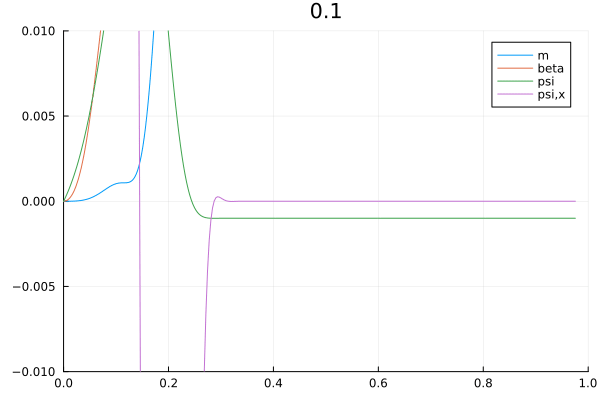

In [19]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 50000:100:88711
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.001.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.001.gif")
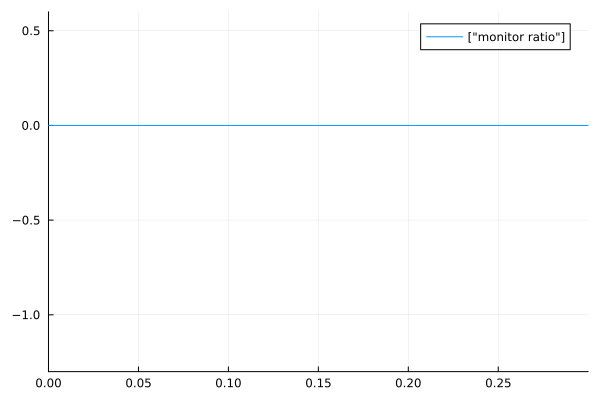

In [477]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 100:100:100
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [140]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

# tests

In [57]:
include("./ScalarField.jl");

In [77]:
function ff(x)
    return x^2
end

function grid(x)
    return(2*x)
end

function jacobiann(x)
    return 2
end

jacobiann (generic function with 1 method)

In [94]:
dx=0.1
x=range(-3*dx,1+3*dx,step=dx)
y=ff.(x)

L=16
aux=zeros(L)

for i in 4:L-3
    aux[i]=Dertest(y,i,x)
end
aux[4:L-3]

10-element Vector{Float64}:
 3.469446951953615e-16
 0.19999999999999996
 0.3999999999999998
 0.6000000000000004
 0.8
 1.0
 1.2
 1.3999999999999995
 1.6000000000000003
 1.8

In [98]:
xnew=grid.(x)
ynew=ff.(xnew)

auxnew=zeros(L)

for i in 4:L-3
    auxnew[i]=Dertest(ynew,i,xnew)/jacobiann(xnew[i])
end
auxnew[4:L-3]


10-element Vector{Float64}:
 3.469446951953615e-16
 0.19999999999999996
 0.3999999999999998
 0.6000000000000004
 0.8
 1.0
 1.2
 1.3999999999999995
 1.6000000000000003
 1.8

In [129]:
function ff(x)
    return x^2
end

function grid(x)
    return(x^2)
end

function jacobiann(x)
    return 2*x
end

dx=0.1
x=range(-3*dx,1+3*dx,step=dx)
y=ff.(x)

L=16
aux=zeros(L)

for i in 4:L-3
    aux[i]=Dertest(y,i,x)
end
println(aux[4:L-3])

xnew=grid.(x)
ynew=ff.(xnew)

auxnew=zeros(L)

for i in 4:L-3
    auxnew[i]=Dertest(ynew,i,x)#*jacobiann(x[i])
end
println(" ")
println(auxnew[4:L-3])
println(2 .* xnew)
#aux new represents the derivatives at xnew, not at x! thats why aux and auxnew arent the same

USE INTERPOLATION.
NOTE: ynew is calculated at different gridpoints, that are uneven. thats why Dertest(ynew,i,x) wont work. but doing Dertest(ynew,i,xnew) is uneven in x, so i need to do interpolation

[3.469446951953615e-16, 0.19999999999999996, 0.3999999999999998, 0.6000000000000004, 0.8, 1.0, 1.2, 1.3999999999999995, 1.6000000000000003, 1.8]
 
[0.012000000000000056, 0.007999999999999993, 0.039999999999999994, 0.12000000000000009, 0.272, 0.52, 0.8879999999999998, 1.3999999999999997, 2.080000000000001, 2.94]
[0.18000000000000005, 0.08000000000000003, 0.020000000000000014, 0.0, 0.01999999999999999, 0.07999999999999996, 0.18000000000000005, 0.32000000000000006, 0.5, 0.72, 0.9799999999999999, 1.2800000000000002, 1.6200000000000006, 2.0, 2.4200000000000004, 2.88, 3.3800000000000003]


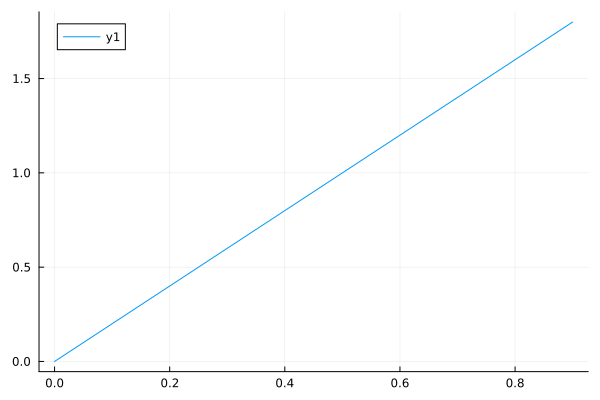

In [122]:
plot(x[4:L-3], aux[4:L-3])

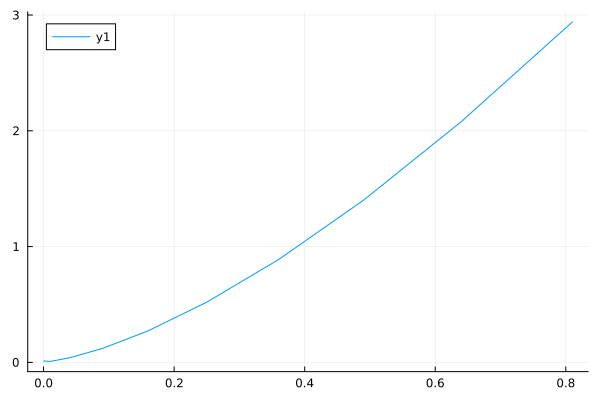

In [123]:
plot(xnew[4:L-3], auxnew[4:L-3])

# new test

In [147]:
include("./ScalarField.jl");

In [160]:
function ff(x)
    return x^2
end

function grid(x)
    return(1/2+1/2*cos(pi*(1-x)))
end

res=1
dx=0.01
x=range(-3*dx,1+3*dx,step=dx)
y=ff.(x)

L=length(x)
aux=zeros(L)

for i in 4:L-3
    aux[i]=Dertest(y,i,x)
end
println(aux[4:L-3])

xnew=grid.(x)
ynew=ff.(xnew)

spl=Spline1D(xnew[4:L-3],ynew[4:L-3],k=4)
auxnew=zeros(L)

for i in 4:L-3
    auxnew[i]=unevenDer(ynew,i,xnew,spl)
end
println(" ")
println(auxnew[4:L-3])
println(" ")
println(2 .* xnew[4:L-3])

[-5.421010862427522e-18, 0.02, 0.04, 0.05999999999999999, 0.08000000000000002, 0.10000000000000005, 0.1199999999999999, 0.1400000000000001, 0.16000000000000003, 0.1799999999999999, 0.2000000000000001, 0.22, 0.2399999999999999, 0.25999999999999995, 0.2800000000000004, 0.29999999999999966, 0.32000000000000006, 0.34000000000000047, 0.35999999999999943, 0.3800000000000001, 0.4000000000000004, 0.41999999999999915, 0.44000000000000006, 0.46000000000000085, 0.4799999999999994, 0.5, 0.5199999999999999, 0.5399999999999997, 0.560000000000002, 0.5799999999999987, 0.6, 0.6199999999999999, 0.6399999999999997, 0.6600000000000003, 0.6800000000000018, 0.699999999999998, 0.7199999999999999, 0.7399999999999998, 0.7600000000000002, 0.7800000000000008, 0.8000000000000017, 0.8199999999999964, 0.8399999999999997, 0.8600000000000003, 0.8800000000000008, 0.9, 0.9200000000000029, 0.9399999999999983, 0.9599999999999989, 0.9799999999999994, 1.0, 1.0200000000000005, 1.0400000000000011, 1.059999999999999, 1.079999

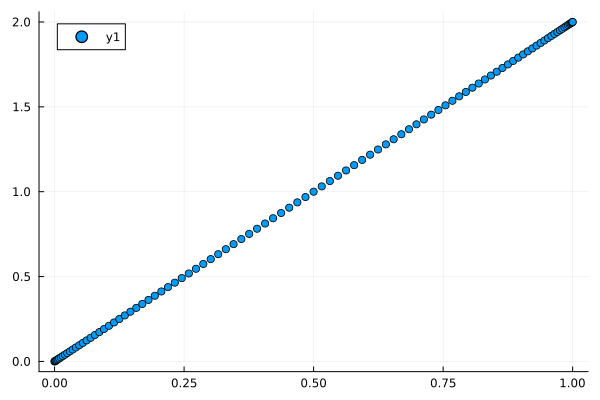

In [149]:
#plot(x,y)
scatter(xnew[4:L-3],auxnew[4:L-3])

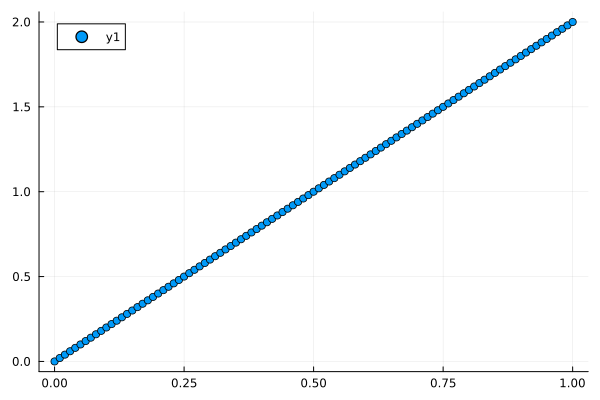

In [150]:
scatter(x[4:L-3],aux[4:L-3])

In [155]:
xnew=grid.(x)
ynew=ff.(xnew)

spls=[Spline1D(xnew[4:L-3],ynew[4:L-3],k=4)]

state_array[:,1]=ynew

auxnew=zeros(L)

for i in 4:L-3
    auxnew[i]=unevenDer(ynew,i,1,xnew,spls)
end

In [132]:
state_array=zeros(L,5);
state_array[:,1]=auxnew;
state_array[:,5]=xnew

107-element Vector{Float64}:
 0.002219017698460002
 0.0009866357858642205
 0.0002467198171342
 0.0
 0.0002467198171342
 0.0009866357858642205
 0.002219017698460002
 0.0039426493427611176
 0.00615582970243117
 0.008856374635655695
 0.012041619030626338
 0.015708419435684462
 0.019853157161528467
 ⋮
 0.9842915805643155
 0.9879583809693737
 0.9911436253643443
 0.9938441702975689
 0.9960573506572389
 0.99778098230154
 0.9990133642141358
 0.9997532801828658
 1.0
 0.9997532801828658
 0.9990133642141358
 0.99778098230154

In [133]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"